In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Install xgboost library
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing models
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
#Dataset importing and display head
dataset = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [5]:
df = dataset.drop(columns=[' Destination Port'])
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [40]:
#Assigning X- independent and y- dependent variable
X = df.drop(columns=' Label')
y = df.iloc[:,77]
print(X.shape)
print(y.shape)

(190911, 77)
(190911,)


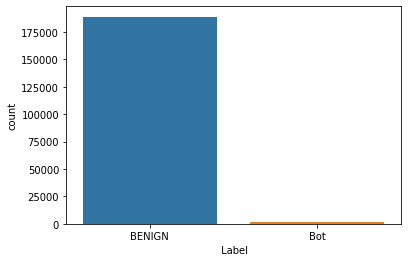

In [7]:
sns.countplot(x=' Label',data=df)

In [8]:
#Scaling independent features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
#Tranforming to scaled data
scaled_data=scaler.transform(X)
X = scaled_data

In [10]:
#Importing Randomsearch cross validation
from sklearn.model_selection import RandomizedSearchCV

In [11]:
import xgboost as xgb
classifier=xgb.XGBClassifier()

In [12]:
#Hyperparameter optimization
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 18, 20],
 "min_child_weight" : [ 1, 3, 5, 7, 8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9 ]   
}

In [13]:
#providing XGboost classifier to random search cross validation 
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=100,verbose=3)

In [14]:
#Implementing random search CV by providing input features
random_search.fit(X,y)

Fitting 100 folds for each of 5 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 106.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 228.8min finished


RandomizedSearchCV(cv=100, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_...
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                               

In [15]:
#paramaters estimator and optimized results
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=20,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [17]:
#Assigning an object to XGBclassifier
gbm = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=20,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [18]:
from sklearn.metrics import accuracy_score 

In [19]:
#Importing Stratified K fold cross validation
from sklearn.model_selection import StratifiedKFold

#Implementing Stratified K fold CV
accuracy=[]
skf=StratifiedKFold(n_splits=100, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gbm.fit(X_train,y_train)
    predictions = gbm.predict(X_test)
    score_=accuracy_score(predictions,y_test)
    accuracy.append(score_)
print(accuracy) 

[0.9984293193717277, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9994764397905759, 1.0, 1.0, 1.0, 0.9994764397905759, 1.0, 1.0, 1.0, 0.9994764397905759, 1.0, 1.0, 1.0, 1.0, 0.9994764397905759, 0.9989528795811519, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9994764397905759, 1.0, 1.0, 0.9994764397905759, 0.9989528795811519, 0.9989528795811519, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9994764397905759, 0.9994764397905759, 1.0, 0.9984293193717277, 1.0, 0.9979057591623036, 0.9994764397905759, 0.9994764397905759, 0.9994764397905759, 1.0, 0.9994764397905759, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989517819706499, 1.0, 1.0, 1.0, 1.0, 0.999475890985325, 1.0, 0.999475890985325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989517819706499, 1.0, 1.0, 1.0, 0.999475890985325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999475890985325, 1.0, 1.0, 0.999475890985325]


In [20]:
#Accuracy evaluation
np.array(accuracy).mean()

0.9998062333300405

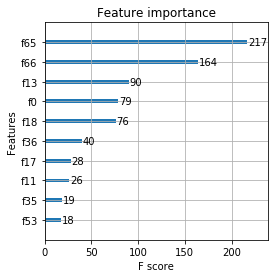

In [45]:
from pylab import rcParams
plot_importance(gbm, max_num_features=10)
rcParams['figure.figsize'] = 4,4

In [69]:
#Evaluating top features
cols_list = list(X.columns)
feature_importances = pd.DataFrame(gbm.feature_importances_,
                                   index = cols_list,
                                    columns=['score']).sort_values('score', ascending=False)
feature_importances.head(10)

,score
Total Length of Bwd Packets,0.133937
Total Backward Packets,0.093459
Flow IAT Max,0.079473
Bwd IAT Std,0.071138
Avg Bwd Segment Size,0.062003
Bwd Packet Length Mean,0.044577
Max Packet Length,0.040880
Fwd IAT Min,0.032842
Bwd Packet Length Min,0.025970
Packet Length Mean,0.025218
